# 7.1 핵심 개념
- 학습데이터로 여러 의사결정트리를 구성하여 분석, 이를 종합하는 앙상블 기법
- 의사결정나무 수십~수백개가 예측한 분류 혹은 회귀값을 평균낸 모델
- 학습 데이터를 무작위로 샘플링해서 다수의 의사결정 트리 분석→'랜덤'+'포레스트'

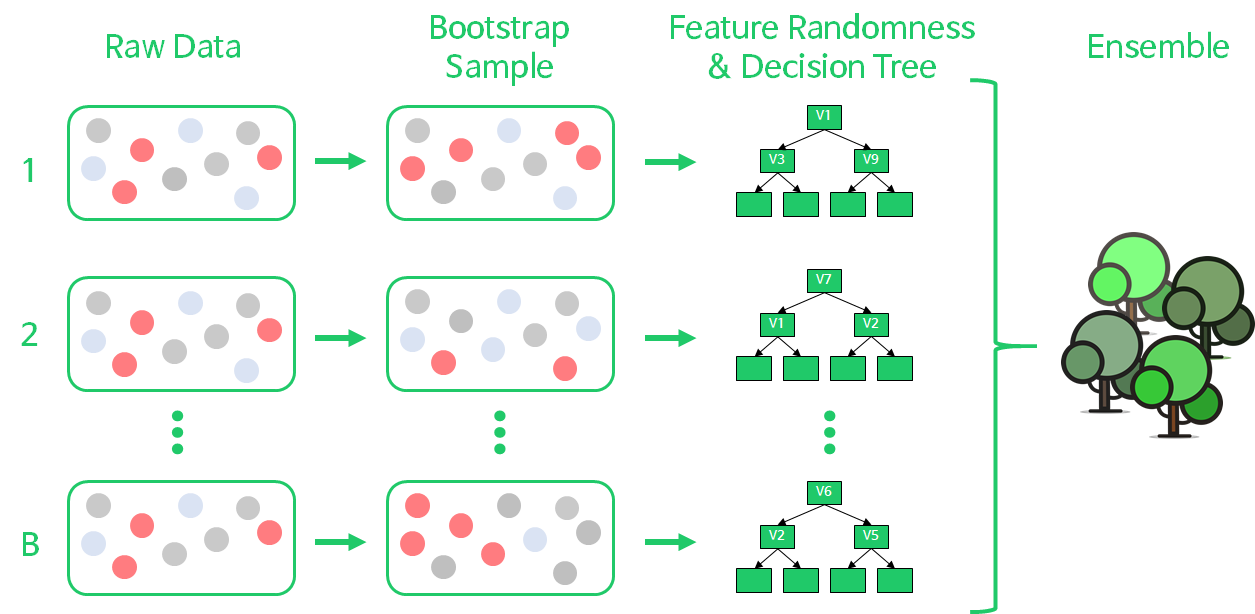

# 7.3 분석 코드

## Part1. 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42) 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
print('TrainSet Score : ', model.score(X_scaled_train, y_train))
pred_test=model.predict(X_scaled_test)
print('TestSet Score : ', model.score(X_scaled_test, y_test))

TrainSet Score :  1.0
TestSet Score :  0.9649122807017544


In [9]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬 : \n',confusion_train)

from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print('분류예측 레포트 : \n',cfreport_train)

훈련데이터 오차행렬 : 
 [[333   0]
 [  0 179]]
분류예측 레포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [10]:
from sklearn.metrics import confusion_matrix
confusion_test=confusion_matrix(y_test, pred_test)
print('테스트데이터 오차행렬 : \n',confusion_test)

from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print('분류예측 레포트 : \n',cfreport_test)

테스트데이터 오차행렬 : 
 [[106   5]
 [  1  59]]
분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [20]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestClassifier(),
                      param_grid={'n_estimators':range(100,1000,100),'max_features':["auto", "sqrt", "log2"]},
                      cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
print('TestSet Score : ', grid_search.score(X_scaled_test, y_test))

Best Parameter :  {'max_features': 'auto', 'n_estimators': 800}
Best Score :  0.9745669141442985
TestSet Score :  0.9649122807017544


In [22]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_search=RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions={'n_estimators':randint(low=100, high=1000),'max_features':["auto", "sqrt", "log2"]},
                      cv=5)
random_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",random_search.best_params_)
print("Best Score : ",random_search.best_score_)
print('TestSet Score : ', random_search.score(X_scaled_test, y_test))

Best Parameter :  {'max_features': 'log2', 'n_estimators': 903}
Best Score :  0.9745669141442985
TestSet Score :  0.9649122807017544


## Part2. 회귀

In [23]:
data2=pd.read_csv("../data/house_price.csv", encoding='utf-8')

X=data2[data2.columns[:-1]]
y=data2[['house_value']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train) )
print("TestSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.9464092315343673
TestSet Score :  0.6226307648517352


In [26]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)

RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)

print("훈련데이터 RMSE : ",RMSE_train)
print('테스트데이터 RMSE : ',RMSE_test)

훈련데이터 RMSE :  22095.103296546014
테스트데이터 RMSE :  58728.06878225616


In [29]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestRegressor(),
                      param_grid={'n_estimators':range(100,500,100),'max_features':["auto", "sqrt", "log2"]},
                      cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
print('TestSet Score : ', grid_search.score(X_scaled_test, y_test))

Best Parameter :  {'max_features': 'sqrt', 'n_estimators': 300}
Best Score :  0.6265976316807963
TestSet Score :  0.6389573560695236
